# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:



---

Metode belajar mesin dibagi menjadi 2, yaitu Supervised Learning dan Unsupervised Learning. Unsupervised learning adalah metode belajar mesin yang tidak membutuhkan training data sets untuk belajar, melainkan Unsupervised Learning adalah metode untuk mengelompokkan sebuah no-labeled data.

Salah satu metode Unsupervised Learning adalah K-Means Clustering. K-Means Clustering ini menggunakan metode centroid dan menghitung jarak dari setiap data yang ada ke centroidnya dan assign data tersebut ke centroid masing-masing (jarak yang paling dekat). 

---

Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [11]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df = df.fillna(method='ffill')
df.tail()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0
249,250,Laki-laki,120.0,98,15.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










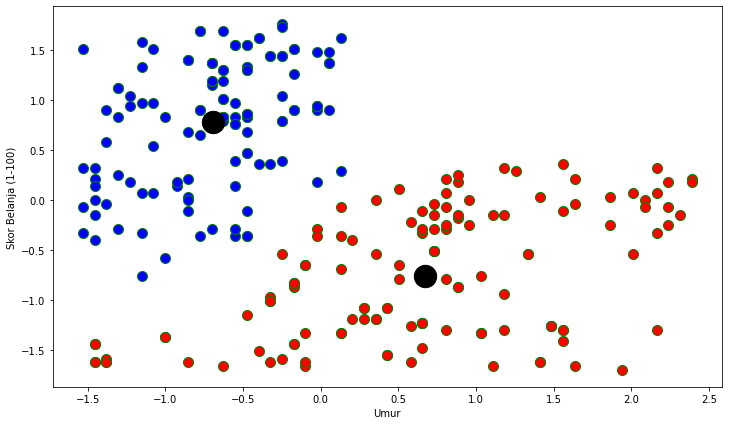

In [49]:
#code here
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# df = df.fillna(method='ffill')

# K MEANS CLUSTERING
df_ = df[['Umur', 'Skor Belanja (1-100)']]
q3 = df_.quantile(.75)
q1 = df_.quantile(.25)
IQR = q3 - q1
df_clean = df_[((df_ >= q1 - 1.5 * IQR) & (df_ <= q3 + 1.5 * IQR))]
df_clean.dropna(axis=0, inplace=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean.astype(float))

kmeans = KMeans(n_clusters=2).fit(df_scaled)
labels = kmeans.labels_
df_scaled = pd.DataFrame(data=df_scaled, columns=['Umur', 'Skor Belanja (1-100)'])
df_scaled['label'] = labels

df_kmeans_0 = df_scaled[df_scaled['label'] == 0]
df_kmeans_1 = df_scaled[df_scaled['label'] == 1]

fig1, axes1 = plt.subplots(figsize=(12, 7))
axes1.scatter(x=df_kmeans_0['Umur'], y=df_kmeans_0['Skor Belanja (1-100)'], c='red', s=100, edgecolor='green', linestyle='-')
axes1.scatter(x=df_kmeans_1['Umur'], y=df_kmeans_1['Skor Belanja (1-100)'], c='blue', s=100, edgecolor='green', linestyle='-')
axes1.set_xlabel('Umur')
axes1.set_ylabel('Skor Belanja (1-100)')

centers = kmeans.cluster_centers_
axes1.scatter(x=centers[:, 0], y=centers[:, 1], c='black', s=500)
plt.show()

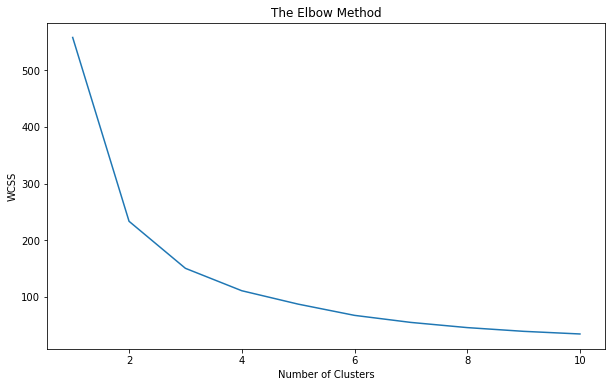

In [56]:
# ELBOW GRAPH
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++').fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

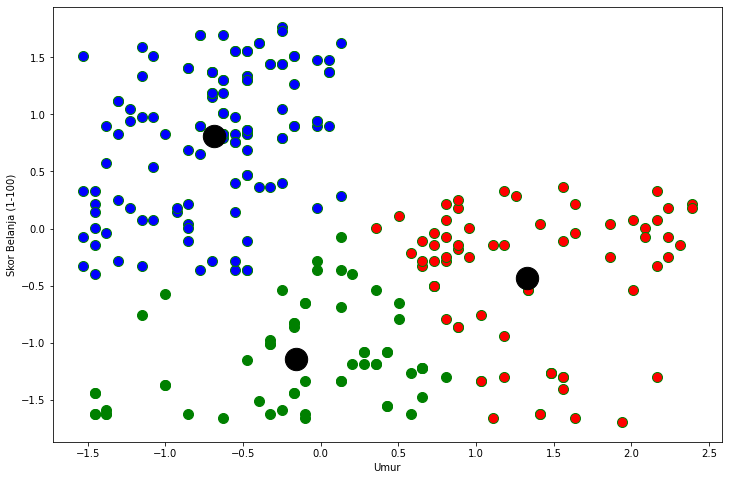

In [67]:
# K MEANS N_CLUSTERS = 3
N = 3
kmeans = KMeans(n_clusters=N, random_state=42).fit(df_scaled)
labels2 = kmeans.labels_
df_scaled['label 2'] = labels2
colors = ['blue', 'red', 'green']
centers2 = kmeans.cluster_centers_
fig, axes = plt.subplots(figsize=(12, 8))

for i in range(N):
    df_kmeans = df_scaled[df_scaled['label 2'] == i]
    axes.scatter(x=df_kmeans['Umur'], y=df_kmeans['Skor Belanja (1-100)'], c=colors[i], s=100, edgecolor='green', linestyle='-')
    axes.scatter(x=centers2[i, 0], y=centers2[i, 1], c='black', s=500)

axes.set_xlabel('Umur')
axes.set_ylabel('Skor Belanja (1-100)')
plt.show()

In [72]:
# SILHOUETTE COEFFICIENT
from sklearn.metrics import silhouette_score

print(silhouette_score(df_scaled, labels))
print(silhouette_score(df_scaled, labels2))

0.572806699868151
0.5881255010303492


Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:

- Untuk umur yang merupakan di atas rata-rata, sebagian besar memiliki skor belanja yang dibawah rata-rata. Hal ini mungkin dikarenakan dengan pendapatannya yang sudah mulai berkurang, atau sudah mencapai umur pensiumnya

- Di sisi lain, umur yang merupakan di bawah rata-rata, terbagi menjadi 2 bagian ada yang skor belanjanya di atas rata-rata, namun juga ada yang dibawah rata-rata. Kemungkinan besar hal ini dipengaruhi oleh pendapatan dari masing-masing orang juga.

Kesimpulan:

Oleh sebab itu, bagi pemilik supermarket, sebaiknya lebih banyak menyediakan barang-barang kebutuhan anak muda, remaja, atau dewasa muda. Hal ini dikarenakan rentang usia tersebutlah yang memiliki kemungkinan untuk memberikan skor belanja yang lebih tinggi.